<a href="https://colab.research.google.com/github/prasanna-venkatesh-m/MINST-Digits-Classification/blob/main/MINST_Digits_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
import math

In [43]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)  # (60000, 28, 28)
print(y_train.shape)  # (60000,)

(60000, 28, 28)
(60000,)


In [44]:
own_images = []

for i in range(0,10):
  own_images.append(f'/content/{i}a.png')
  own_images.append(f'/content/{i}b.png')

sample_x = []
sample_y = []

test_samples_x = []

for i in range(0, len(own_images)):
  img = image.load_img(own_images[i], target_size=(28,28), color_mode='grayscale')
  img_array = image.img_to_array(img)
  img_array = img_array / 255.0
  img_array = 1.0 - img_array
  img_array = np.expand_dims(img_array, axis=0)
  test_samples_x.append(img_array.squeeze())
  if(i%2==0):
    sample_x.append(img_array.squeeze())
    sample_y.append(round(i/2))

In [45]:
sample_x = np.array(sample_x)
sample_y = np.array(sample_y)

In [46]:
sample_y.shape

(10,)

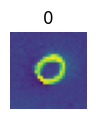

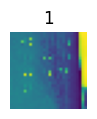

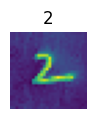

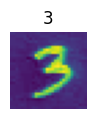

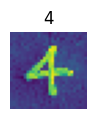

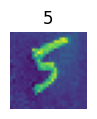

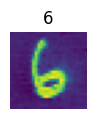

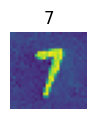

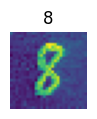

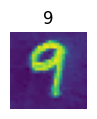

In [47]:
for i in range(0, len(sample_x)):
  plt.figure(figsize=(1,1))
  plt.imshow(sample_x[i])
  plt.title(sample_y[i])
  plt.axis('off')
  plt.show()

In [48]:
new_x = np.concatenate((x_train, sample_x), axis=0)
new_y = np.concatenate((y_train, sample_y), axis=0)

In [49]:
print(new_x.shape)
print(new_y.shape)

(60010, 28, 28)
(60010,)


In [50]:
ohe = OneHotEncoder()
y_train_ohe = ohe.fit_transform(new_y.reshape(-1,1)).toarray()
y_test_ohe = ohe.transform(y_test.reshape(-1,1)).toarray()

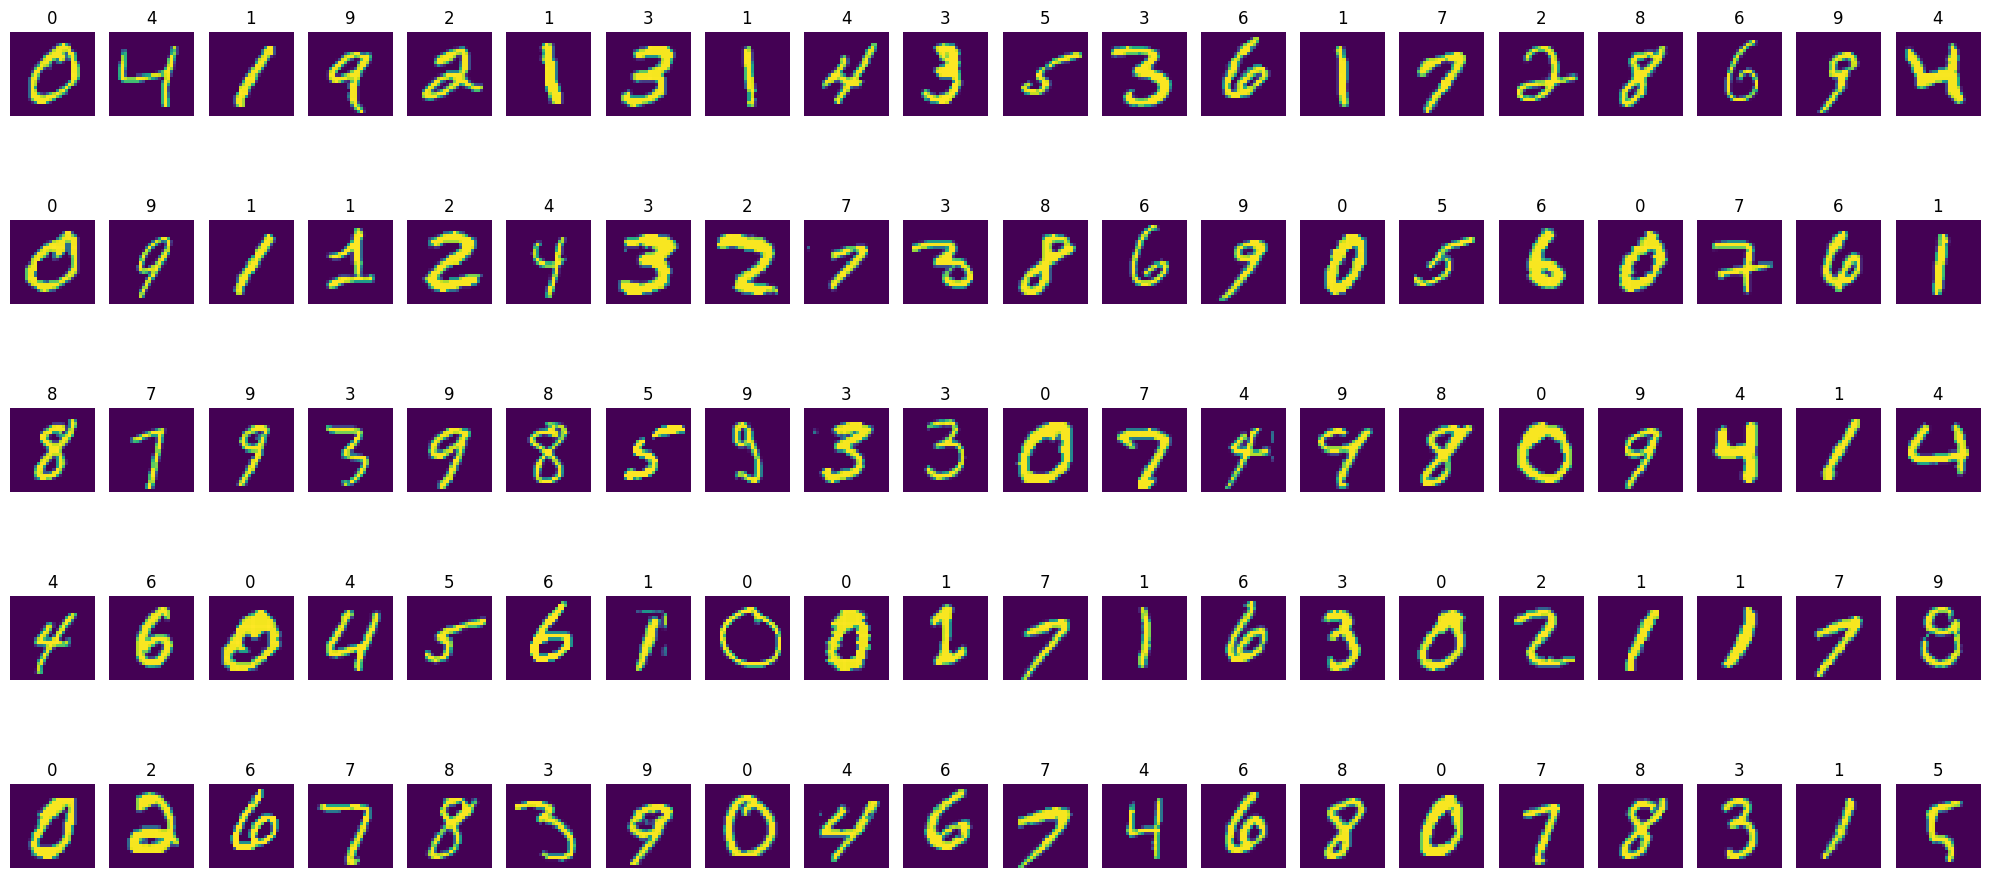

In [51]:
plt.figure(figsize=(20,10))

for i in range(1,101):
  plt.subplot(5,20,i)
  plt.imshow(x_train[i])
  plt.title(y_train[i])
  plt.axis('off')

plt.tight_layout()
plt.show()


In [52]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [53]:
model = Sequential([
    Input(shape=(new_x.shape[1], new_x.shape[2])),
    Flatten(),
    Dense(64, activation='relu', name='L1'),
    Dense(16, activation='relu', name='L2'),
    Dense(10, activation='softmax', name='L3')
], name='my_model')

In [54]:
model.compile(
    loss = CategoricalCrossentropy(),
    optimizer = Adam(learning_rate=0.001)
)

In [55]:
model.fit(new_x, y_train_ohe, epochs=100)

Epoch 1/100
1876/1876 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 4.7438
Epoch 2/100
1876/1876 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.3556
Epoch 3/100
1876/1876 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.0086
Epoch 4/100
1876/1876 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.5884
Epoch 5/100
1876/1876 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.3119
Epoch 6/100
1876/1876 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2331
Epoch 7/100
1876/1876 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.1908
Epoch 8/100
1876/1876 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1755
Epoch 9/100
1876/1876 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1591
Epoch 10/100
1876/1876 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1494
Epoch 11/100
1876/1876 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1293
Epoch 12/100
1876/1876 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1257
Epoch 13/100
1876/1876 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1166
Epoch 14/100
1876/1876 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1172
Epoch 15/100
18

In [56]:
y_pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


7
[2.5221971e-41 3.0248726e-22 1.1327791e-26 8.3013629e-17 2.1113042e-39
 0.0000000e+00 0.0000000e+00 1.0000000e+00 3.1389086e-43 2.8420386e-22]


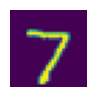

In [57]:
print(np.argmax(y_pred[0]))
print(y_pred[0])
plt.figure(figsize=(1,1))
plt.imshow(x_test[0])
plt.axis('off')
plt.show()

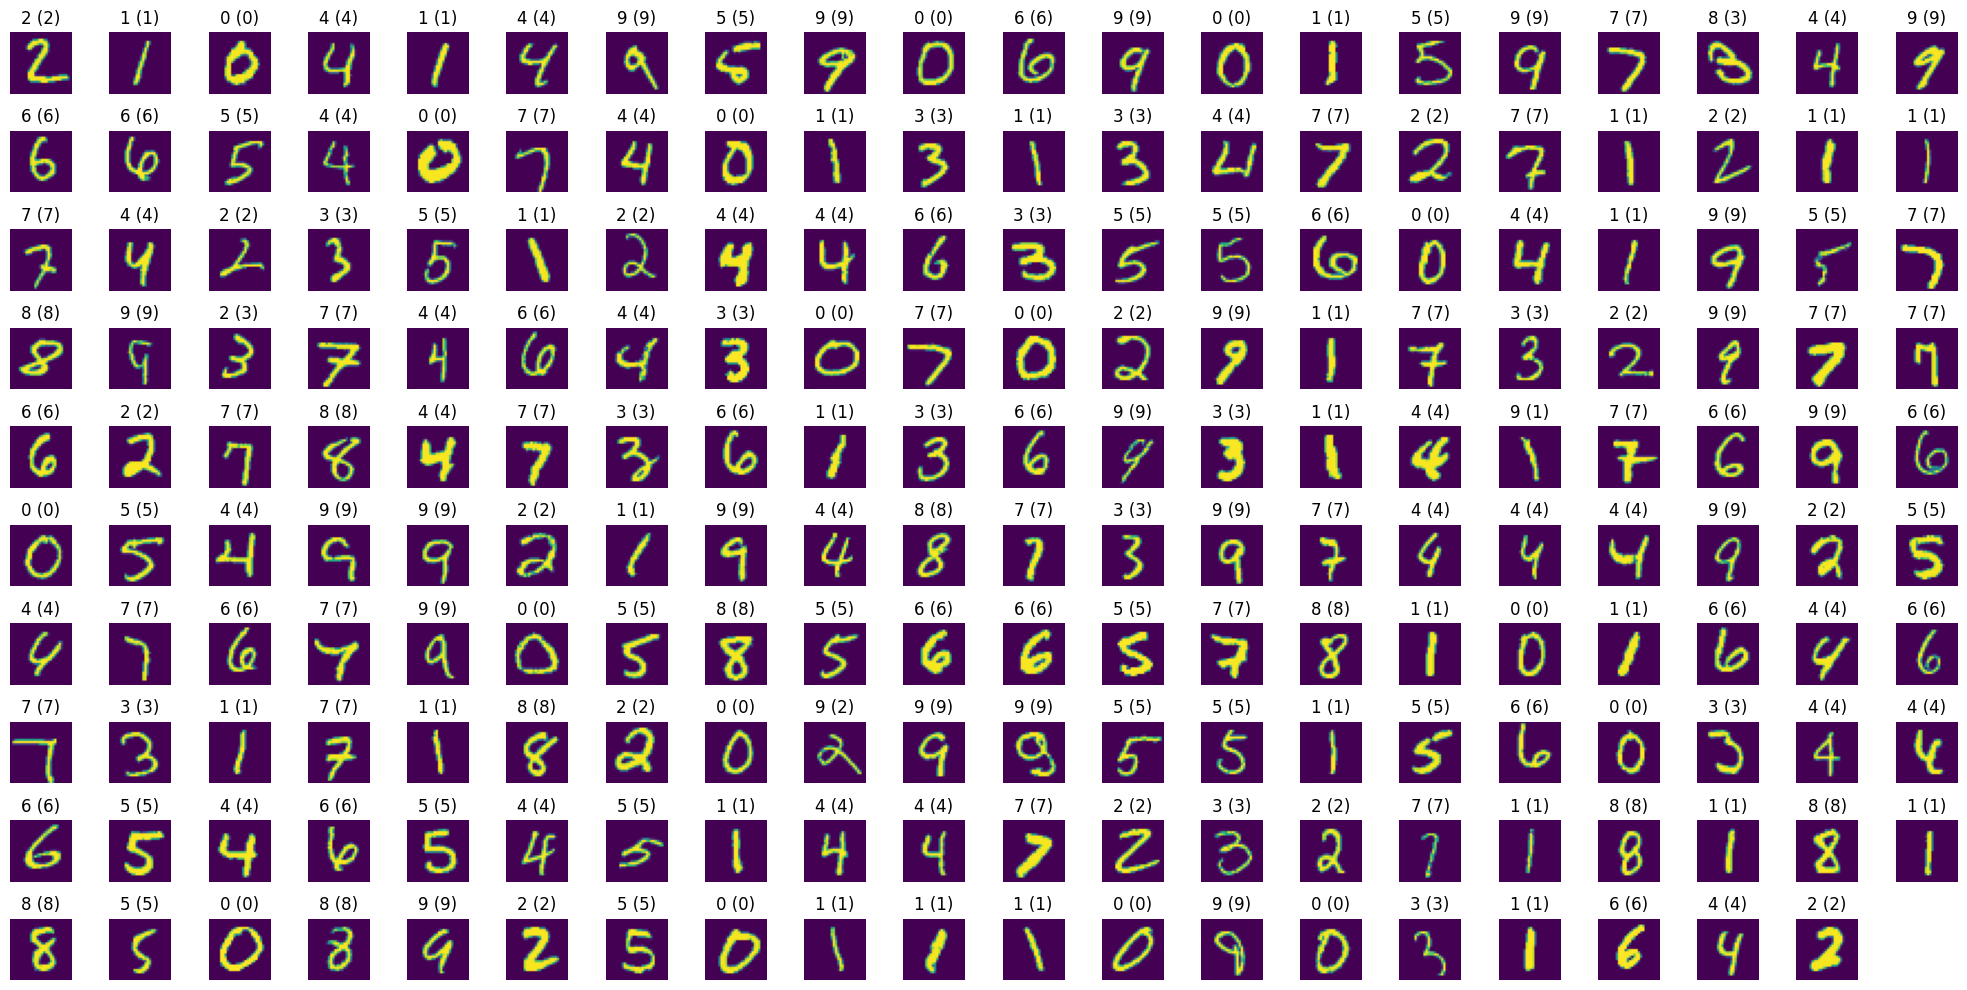

In [58]:
plt.figure(figsize=(20,10))

for i in range(1, 200):
  plt.subplot(10,20,i)
  plt.imshow(x_test[i])
  plt.title(f'{np.argmax(y_pred[i])} ({y_test[i]})')
  plt.axis('off')

plt.tight_layout()
plt.show()

388


/tmp/ipython-input-4050974458.py:21: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


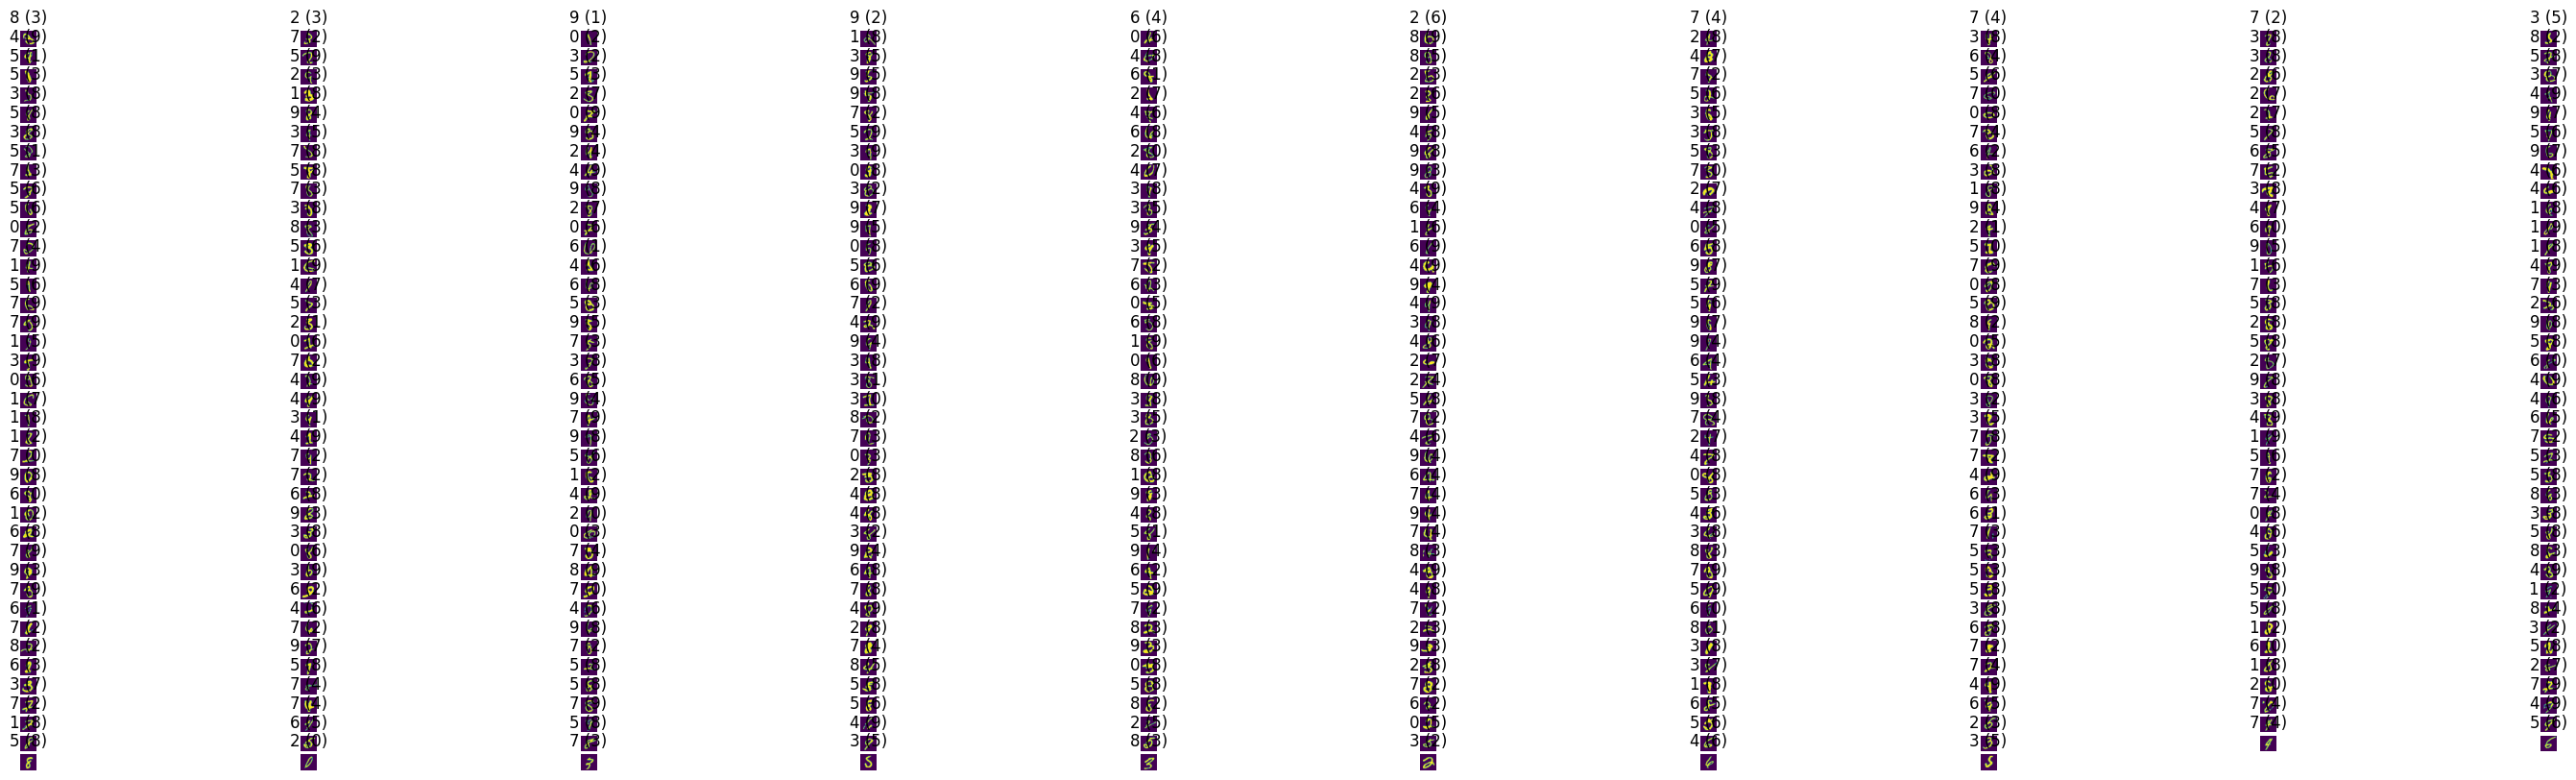

In [59]:
misclassified_x = []
misclassified_y = []
actual_y = []

for i in range(1, len(x_test)):
  if(np.argmax(y_pred[i]) != y_test[i]):
    misclassified_x.append(x_test[i])
    misclassified_y.append(np.argmax(y_pred[i]))
    actual_y.append(y_test[i])

print(len(misclassified_x))

plt.figure(figsize=(37,10))

for i in range(0,len(misclassified_x)):
  plt.subplot(math.ceil(len(misclassified_x) / 10) ,10,i+1)
  plt.imshow(misclassified_x[i])
  plt.title(f'{misclassified_y[i]} ({actual_y[i]})')
  plt.axis('off')

plt.tight_layout()
plt.show()

In [60]:
accuracy_score(y_test, np.argmax(y_pred, axis=1))

0.9612

In [61]:
test = np.array(test_samples_x)

In [62]:
predicted = model.predict(test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


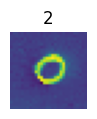

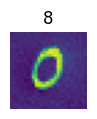

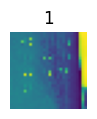

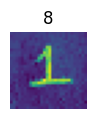

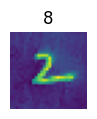

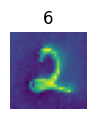

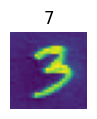

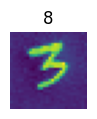

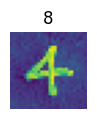

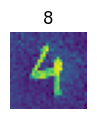

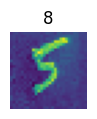

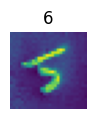

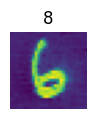

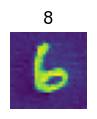

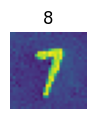

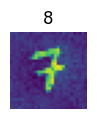

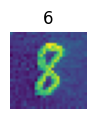

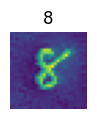

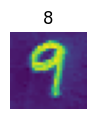

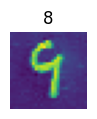

In [63]:
for i in range(len(test)):
  plt.figure(figsize=(1,1))
  plt.imshow(test[i])
  plt.title(np.argmax(predicted[i]))
  plt.axis('off')
  plt.show()

In [64]:
# test_images = []

# for i in range(0,10):
#   test_images.append(f'/content/{i}a.png')
#   test_images.append(f'/content/{i}b.png')

In [65]:
# for i in range(0, len(test_images)):
#   img = image.load_img(test_images[i], target_size=(28,28), color_mode='grayscale')
#   img_array = image.img_to_array(img)
#   img_array = img_array / 255.0
#   img_array = 1.0 - img_array
#   img_array = np.expand_dims(img_array, axis=0)
#   predicted = model.predict(img_array)
#   print(predicted)
#   plt.figure(figsize=(1,1))
#   plt.imshow(img_array[0], cmap='gray')
#   plt.title(np.argmax(predicted))
#   plt.axis('off')
#   plt.show()